In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.patches as mpatches
import sys

In [24]:
x_transform_all = np.loadtxt("/expanse/projects/gymreklab/helia/ensembl/experiments/pca/transformed_mat.txt")

In [29]:
samples = []
with open("/expanse/projects/gymreklab/helia/ensembl/experiments/pca/names.txt") as f:
    for line in f:
        samples = line.strip().split()

pop_to_color = {}
for pop in ["ACB","ASW"]: pop_to_color[pop] = "darkorange" # Admixed African
for pop in ["GIH","BEB","ITU"]: pop_to_color[pop] = "mediumpurple" # South Asian
for pop in ["CDX","CHB","CHS","JPT","KHV"]: pop_to_color[pop] = "yellowgreen" # East Asian
for pop in ["CEU","FIN","GBR","IBS","TSI"]: pop_to_color[pop] = "mediumturquoise" # European
for pop in ["CLM","MXL","PEL","PJL","PUR","STU"]: pop_to_color[pop] = "brown" # American
for pop in ["LWK","MSL","YRI","ESN","GWD"]: pop_to_color[pop] = "gold" # African
for pop in ['Benin','Botswana','Burkina_Faso-Ghana','Cameroon','Mali','Nigeria','Zambia']: pop_to_color[pop] = "gray" # H3Africa

pedigree = pd.read_csv("/expanse/projects/gymreklab/helia/TR_1000G/1000G.ped", delim_whitespace=True)
pedigree = pedigree[['SampleID','Population']]
samp_to_pop = pd.Series(pedigree.Population.values,index=pedigree.SampleID).to_dict()

H3Africa_names = pd.read_csv("/expanse/projects/gymreklab/helia/H3Africa/names/H3A_Baylor_sample_country.txt", header=None, delim_whitespace=True)

for index,row in H3Africa_names.iterrows():
    if row[1] == "Cameroon_24" or row[1] == "Cameroon_26":
        samp_to_pop[row[0]] = "Cameroon"
    else:   
        samp_to_pop[row[0]] = row[1]

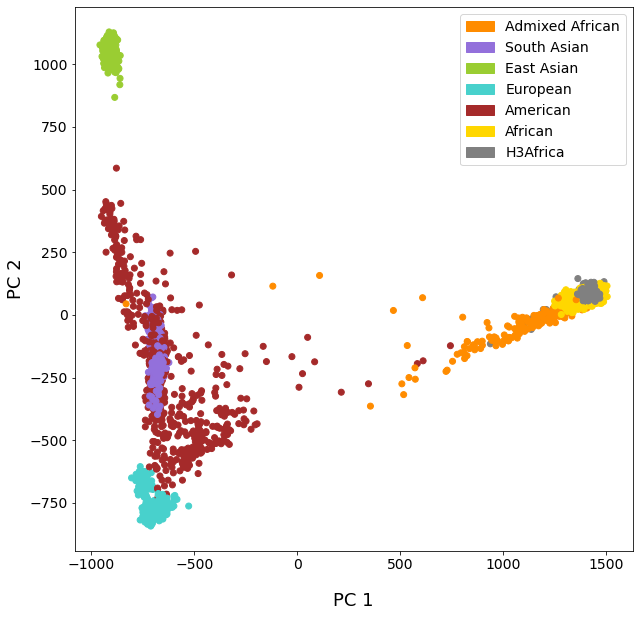

In [32]:
colors = []
for sample in samples:
    colors.append(pop_to_color[samp_to_pop[sample.strip()]])

plt.figure(figsize=(10,10))
plt.scatter(x_transform_all[:,0], x_transform_all[:,1], c=colors)

blue_patch = mpatches.Patch(color='darkorange', label='Admixed African')
orange_patch = mpatches.Patch(color='mediumpurple', label='South Asian')
green_patch = mpatches.Patch(color='yellowgreen', label='East Asian')
yellow_patch = mpatches.Patch(color='mediumturquoise', label='European')
purple_patch = mpatches.Patch(color='brown', label='American')
red_patch = mpatches.Patch(color='gold', label='African')
gray_patch = mpatches.Patch(color='gray', label='H3Africa')


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(handles=[blue_patch,orange_patch,green_patch, yellow_patch,purple_patch,red_patch, gray_patch], loc="upper right", fontsize=14)
#plt.xlabel('PC 1 (%.2f%%)' % (ipca.explained_variance_ratio_[0]*100))
#plt.ylabel('PC 2 (%.2f%%)' % (ipca.explained_variance_ratio_[1]*100))
plt.xlabel('PC 1', fontsize=18, labelpad=20)
plt.ylabel('PC 2',fontsize=18)
plt.savefig("PCA.pdf", dpi=1200)

In [8]:
x_transform = np.loadtxt("/expanse/projects/gymreklab/helia/ensembl/experiments/pca/transformed_mat_AFR.txt")

In [18]:
samples = []
with open("/expanse/projects/gymreklab/helia/ensembl/experiments/pca/AFR_names.txt") as f:
    for line in f:
        samples = line.strip().split()
        f.close()
        break
        
pop_to_color = {}
pop_to_color['LWK'] = "gray"
pop_to_color['MSL'] = "red"
pop_to_color['YRI'] = "darkblue"
pop_to_color['ESN'] = "gold"
pop_to_color['GWD'] = "cyan"

pop_to_color['Benin'] = "purple"
pop_to_color['Botswana'] = "pink"
pop_to_color['Burkina_Faso-Ghana'] = "forestgreen"
pop_to_color['Cameroon'] = "Peru"
pop_to_color['Mali'] = "teal"
pop_to_color['Nigeria'] = "Lime"
pop_to_color['Zambia'] = "royalblue"


pedigree = pd.read_csv("/expanse/projects/gymreklab/helia/TR_1000G/1000G.ped", delim_whitespace=True)
pedigree = pedigree[['SampleID','Population']]
samp_to_pop = pd.Series(pedigree.Population.values,index=pedigree.SampleID).to_dict()

H3Africa_names = pd.read_csv("/expanse/projects/gymreklab/helia/H3Africa/names/H3A_Baylor_sample_country.txt", header=None, delim_whitespace=True)

for index,row in H3Africa_names.iterrows():
    if row[1] == "Cameroon_24" or row[1] == "Cameroon_26":
        samp_to_pop[row[0]] = "Cameroon"
    else:   
        samp_to_pop[row[0]] = row[1]


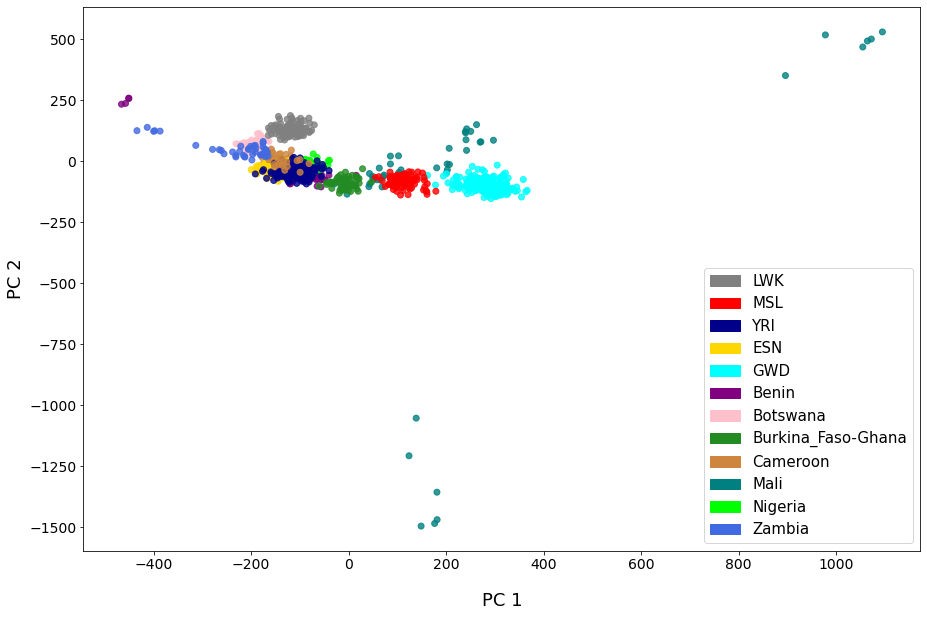

In [23]:
        
data = []
colors = []
for i in range(len(samples)):
    sample = samples[i].strip()
    if samp_to_pop[sample] in pop_to_color.keys():
        colors.append(pop_to_color[samp_to_pop[sample]])
        data.append([x_transform[i,0], x_transform[i,1]])
        
data = np.array(data)


plt.figure(figsize=(15,10))
plt.scatter(data[:,0], data[:,1], c=colors, alpha=0.8)

handles = []
for pop in pop_to_color:
    handles.append(mpatches.Patch(color=pop_to_color[pop], label=pop))



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(handles=handles, loc="lower right", fontsize=15)
#plt.xlabel('PC 1 (%.2f%%)' % (ipca.explained_variance_ratio_[0]*100))
#plt.ylabel('PC 2 (%.2f%%)' % (ipca.explained_variance_ratio_[1]*100))
plt.xlabel('PC 1', fontsize=18, labelpad=20)
plt.ylabel('PC 2',fontsize=18)

plt.savefig("PCA_AFR.pdf", dpi=1200)